In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df = pd.read_csv('toyota.csv')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Cleaning Data

In [170]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [171]:
df.duplicated().sum()

np.int64(39)

In [172]:
df.drop_duplicates()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [173]:
df.shape

(6738, 9)

EDA

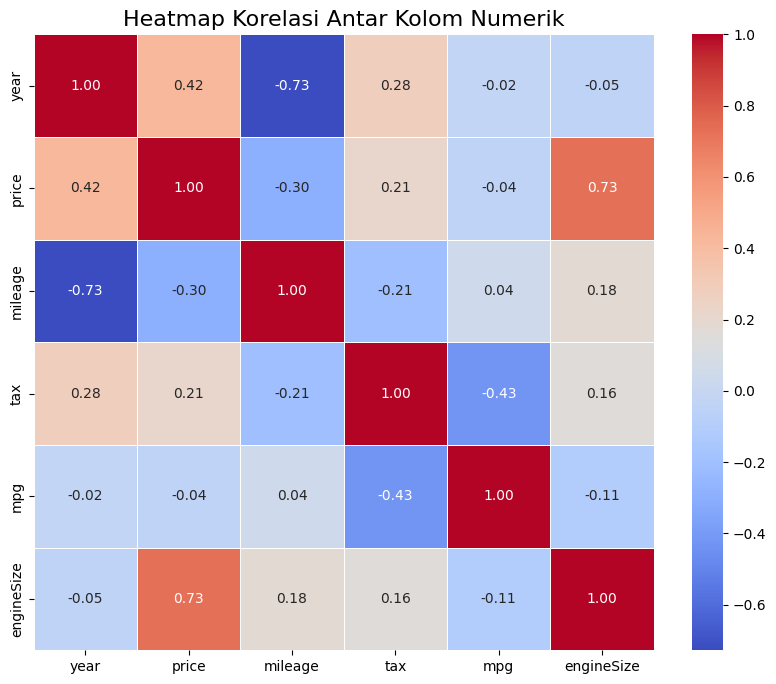

In [174]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Kolom Numerik', fontsize=16)
plt.show()


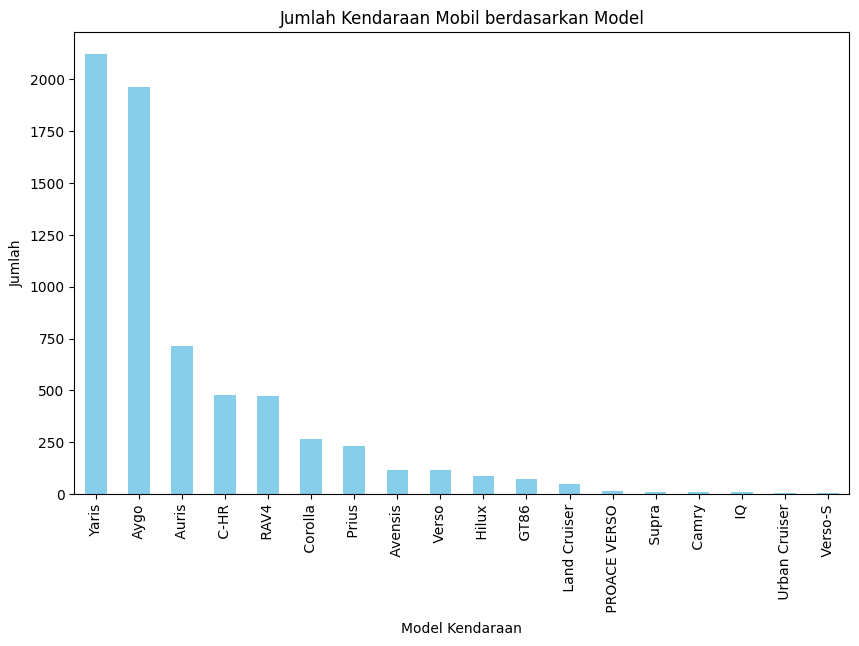

In [175]:
kendaraan = df['model'].value_counts()

plt.figure(figsize=(10, 6))
kendaraan.plot(kind='bar', color='skyblue')
plt.xlabel('Model Kendaraan')
plt.ylabel('Jumlah')
plt.title('Jumlah Kendaraan Mobil berdasarkan Model')
plt.show()

<Figure size 1000x600 with 0 Axes>

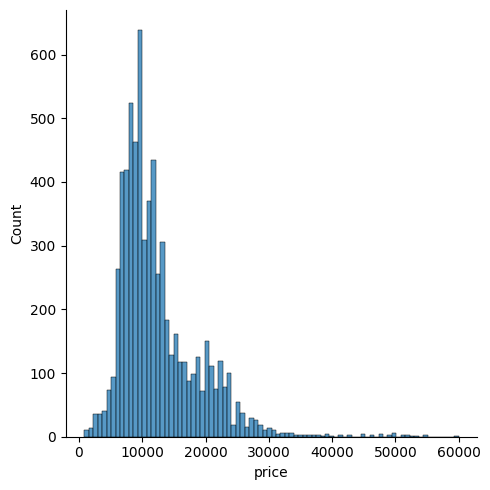

In [176]:
plt.figure(figsize=(10,6))
sns.displot(df['price'])

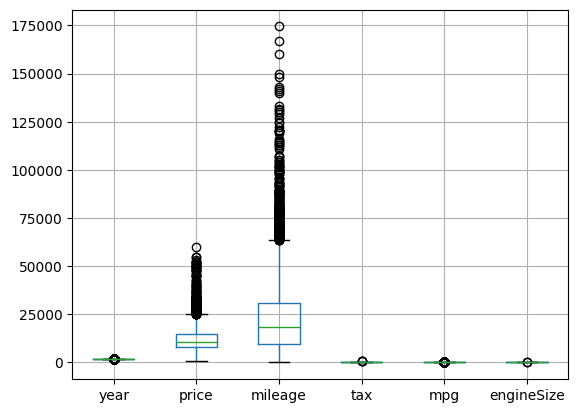

In [177]:
df.boxplot()
plt.show()                                                              

In [178]:
nilai_Rp = 16859

nilai_tukar_euro_ke_rupiah = 16974

df['price'] = df['price'] * nilai_tukar_euro_ke_rupiah
df['tax'] = df['tax'] * nilai_tukar_euro_ke_rupiah

In [179]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2467,Yaris,2016,110161260,Manual,35000,Petrol,0,66.0,1.0
3630,Auris,2011,152681130,Automatic,42357,Hybrid,0,70.6,1.8
4961,Aygo,2019,169655130,Manual,10261,Petrol,2461230,57.7,1.0
4570,Aygo,2015,102964284,Manual,36000,Petrol,0,69.0,1.0
1205,Yaris,2019,220662000,Manual,1000,Petrol,2461230,47.9,1.5


label Encoder

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [181]:
from sklearn.preprocessing import LabelEncoder

m_encoder = LabelEncoder()
t_encoder = LabelEncoder()
f_encoder = LabelEncoder()

df['model'] = m_encoder.fit_transform(df['model'])
df['transmission'] = t_encoder.fit_transform(df['transmission'])
df['fuelType'] = f_encoder.fit_transform(df['fuelType'])

In [182]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3525,0,2016,148522500,1,33123,3,509220,58.9,1.2
6101,11,2019,407342052,0,722,1,2376360,64.2,1.8
127,5,2019,339446052,1,4290,3,2546100,39.2,1.2
2536,17,2014,152307702,0,52682,1,0,78.0,1.5
3113,0,2017,274893930,0,19417,1,0,70.6,1.8


Preparation Data

In [183]:
featurs = ["model", "year", "transmission", "mileage", "fuelType", "tax", "mpg", "engineSize"]
X= df[featurs]
y = df['price']

X.shape, y.shape

((6738, 8), (6738,))

In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test.shape

(1348,)

Training & Evaluation Data

In [185]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)


In [186]:
score = lr.score(X_test, y_test)
print("Akurasi model Regresi Linear Berganda adalah ", score)

Akurasi model Regresi Linear Berganda adalah  0.7848443243472177


In [187]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 36300388.41072848
MSE: 2638060410072907.0
RMSE: 51362052.23774559


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   int64  
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   int64  
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   int64  
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 473.9 KB


In [189]:
input_data = {
    'model': 'GT86',
    'year': 2019,
    'transmission': 'Automatic',
    'mileage': 1401,
    'fuelType': 'petrol',
    'tax': 2385180,
    'mpg': 76.3,
    'engineSize': 1.5
}

# features = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
# df

# input_df = pd.DataFrame([input_data])

# input_df['model'] = m_encoder.transform(input_df['model'])
# input_df['transmission'] = t_encoder.transform(input_df['transmission'])
# input_df['fuelType'] = f_encoder.transform(input_df['fuelType'])



# input_df

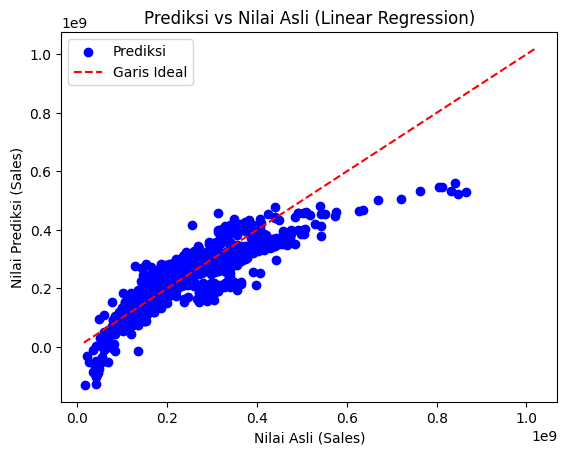

In [190]:
plt.scatter(y_test, pred, color='blue', label='Prediksi')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Garis Ideal')
plt.xlabel('Nilai Asli (Sales)')
plt.ylabel('Nilai Prediksi (Sales)')
plt.title('Prediksi vs Nilai Asli (Linear Regression)')
plt.legend()
plt.show()

In [191]:
import pickle

In [192]:
# 1. Simpan semua preprocessor
preprocessors = {
    'scaler': LabelEncoder(),
    'model_encoder': m_encoder,
    'transmission_encoder': t_encoder,
    'fuel_encoder': f_encoder
}

for name, preprocessor in preprocessors.items():
    with open(f'{name}.pkl', 'wb') as file:
        pickle.dump(preprocessor, file)

# 2. Simpan model
with open('lr.pkl', 'wb') as file:
    pickle.dump(lr, file)

# 3. Simpan urutan kolom
lr_feature_order = X_train.columns.tolist()
with open('feature_order.pkl', 'wb') as file:
    pickle.dump(lr_feature_order, file)

In [193]:
from sklearn.preprocessing import StandardScaler

# Fitur numerik
numeric_features = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
category_features =  ['model', 'transmission', 'fuelType']
scaler = StandardScaler()

# Melakukan standardisasi
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df[numeric_features] = ['model', 'transmission', 'fueltype']

KeyError: "['fueltype'] not in index"

In [166]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Menentukan jumlah cluster menggunakan Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df[numeric_features])  # Fitur numerik yang sudah diskalakan
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Dari plot Elbow, tentukan k yang optimal. Misalnya k=3.
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(df[numeric_features])

# Menambahkan hasil cluster ke dataframe
df['Cluster'] = y_kmeans

KeyError: "['fueltype'] not in index"

In [100]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

            model      year     price  transmission   mileage  fuelType  \
Cluster                                                                   
0        8.276699 -0.754067 -0.472175      0.625840  0.614812  2.021658   
1        8.498329  0.552686 -0.277788      0.937245 -0.514515  2.835128   
2        7.159473  0.388447  1.472252      0.285296 -0.190840  1.071690   

              tax       mpg  engineSize  
Cluster                                  
0       -0.943343  0.347349   -0.165105  
1        0.664805 -0.294880   -0.530447  
2        0.538372 -0.099552    1.368430  


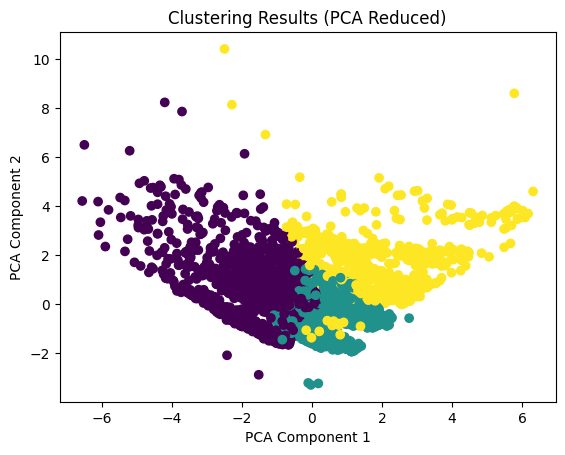

In [ ]:
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2 untuk visualisasi
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[numeric_features])

# Visualisasi
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Clustering Results (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score
score = silhouette_score(df[numeric_features], y_kmeans)

# Menampilkan Silhouette Score
print(f'Silhouette Score: {score}')

Silhouette Score: 0.30369996568039503


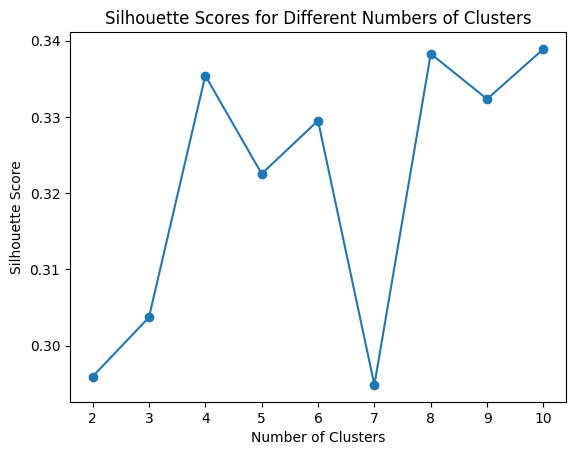

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Mencoba jumlah cluster dari 2 hingga 10
silhouette_scores = []
for i in range(2, 11):
     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
     y_kmeans = kmeans.fit_predict(df[numeric_features])
     
     # Menghitung Silhouette Score untuk setiap jumlah cluster
     score = silhouette_score(df[numeric_features], y_kmeans)
     silhouette_scores.append(score)

# Menampilkan Silhouette Scores untuk berbagai jumlah cluster
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [104]:
import pickle
with open('kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)